# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [17]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [18]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 604


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [20]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?q="

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + city + "&appid=" + weather_api_key
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        response = requests.get(city_url)
        city_weather = response.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = time.strftime('%Y-%m-%d %H:%M:%S', (time.localtime(city_weather["dt"])))

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | dingle
Processing Record 2 of Set 1 | tsabong
Processing Record 3 of Set 1 | grand centre
City not found. Skipping...
Processing Record 4 of Set 1 | hithadhoo
Processing Record 5 of Set 1 | albany
Processing Record 6 of Set 1 | gold coast
Processing Record 7 of Set 1 | talnakh
Processing Record 8 of Set 1 | nikolskoye
Processing Record 9 of Set 1 | ostrovnoy
Processing Record 10 of Set 1 | phalaborwa
Processing Record 11 of Set 1 | arraial do cabo
Processing Record 12 of Set 1 | hermanus
Processing Record 13 of Set 1 | souillac
Processing Record 14 of Set 1 | saskylakh
Processing Record 15 of Set 1 | uji
Processing Record 16 of Set 1 | melo
Processing Record 17 of Set 1 | bantou
Processing Record 18 of Set 1 | ushuaia
Processing Record 19 of Set 1 | nambutalai
Processing Record 20 of Set 1 | jamestown
Processing Record 21 of Set 1 | rikitea
Processing Record 22 of Set 1 | vaini
Processing Record 

City not found. Skipping...
Processing Record 35 of Set 4 | najran
Processing Record 36 of Set 4 | yulara
Processing Record 37 of Set 4 | langsa
Processing Record 38 of Set 4 | albanel
Processing Record 39 of Set 4 | shelburne
Processing Record 40 of Set 4 | norman wells
Processing Record 41 of Set 4 | bakel
Processing Record 42 of Set 4 | gimbi
Processing Record 43 of Set 4 | kulhudhuffushi
Processing Record 44 of Set 4 | luganville
Processing Record 45 of Set 4 | touros
Processing Record 46 of Set 4 | pingzhuang
Processing Record 47 of Set 4 | santa rosa
Processing Record 48 of Set 4 | jiayuguan
Processing Record 49 of Set 4 | baturaja
Processing Record 0 of Set 5 | tarancon
Processing Record 1 of Set 5 | thinadhoo
Processing Record 2 of Set 5 | champerico
Processing Record 3 of Set 5 | ballitoville
Processing Record 4 of Set 5 | xingtai
Processing Record 5 of Set 5 | namibe
Processing Record 6 of Set 5 | bambous virieux
Processing Record 7 of Set 5 | boueni
Processing Record 8 of Se

Processing Record 25 of Set 8 | sabzevar
Processing Record 26 of Set 8 | cap malheureux
Processing Record 27 of Set 8 | marcona
City not found. Skipping...
Processing Record 28 of Set 8 | pascagoula
Processing Record 29 of Set 8 | puerto penasco
Processing Record 30 of Set 8 | monrovia
Processing Record 31 of Set 8 | general bravo
Processing Record 32 of Set 8 | dargaville
Processing Record 33 of Set 8 | rehoboth
Processing Record 34 of Set 8 | benguela
Processing Record 35 of Set 8 | hasaki
Processing Record 36 of Set 8 | polson
Processing Record 37 of Set 8 | dzhebariki-khaya
Processing Record 38 of Set 8 | basco
Processing Record 39 of Set 8 | provideniya
Processing Record 40 of Set 8 | barra do garcas
Processing Record 41 of Set 8 | srednekolymsk
Processing Record 42 of Set 8 | san cristobal
Processing Record 43 of Set 8 | north platte
Processing Record 44 of Set 8 | matara
Processing Record 45 of Set 8 | karratha
Processing Record 46 of Set 8 | severomuysk
Processing Record 47 of 

Processing Record 12 of Set 12 | lubao
Processing Record 13 of Set 12 | puerto baquerizo moreno
Processing Record 14 of Set 12 | olafsvik
Processing Record 15 of Set 12 | carauari
Processing Record 16 of Set 12 | bud
Processing Record 17 of Set 12 | kaitangata
Processing Record 18 of Set 12 | naliya
Processing Record 19 of Set 12 | tobermory
Processing Record 20 of Set 12 | mogadishu
Processing Record 21 of Set 12 | veraval
Processing Record 22 of Set 12 | salalah
Processing Record 23 of Set 12 | artyk
City not found. Skipping...
Processing Record 24 of Set 12 | ulladulla
Processing Record 25 of Set 12 | iaciara
Processing Record 26 of Set 12 | san jeronimo
Processing Record 27 of Set 12 | san francisco del mar
Processing Record 28 of Set 12 | dicabisagan
Processing Record 29 of Set 12 | lefka
Processing Record 30 of Set 12 | blaubeuren
Processing Record 31 of Set 12 | pevek
Processing Record 32 of Set 12 | vaitupu
City not found. Skipping...
Processing Record 33 of Set 12 | urbana
Pro

In [21]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          555
Lat           555
Lng           555
Max Temp      555
Humidity      555
Cloudiness    555
Wind Speed    555
Country       555
Date          555
dtype: int64

In [22]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,dingle,10.9995,122.6711,296.44,91,98,4.92,PH,2023-01-28 14:39:59
1,tsabong,-26.0217,22.4010,301.20,32,24,0.64,BW,2023-01-28 14:40:00
2,hithadhoo,-0.6000,73.0833,300.43,77,30,5.19,MV,2023-01-28 14:37:53
3,albany,42.6001,-73.9662,276.44,64,95,2.11,US,2023-01-28 14:29:41
4,gold coast,-28.0000,153.4333,301.98,78,96,2.06,AU,2023-01-28 14:40:03


In [25]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [ ]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")


In [28]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,dingle,10.9995,122.6711,296.44,91,98,4.92,PH,2023-01-28 14:39:59
1,tsabong,-26.0217,22.4010,301.20,32,24,0.64,BW,2023-01-28 14:40:00
2,hithadhoo,-0.6000,73.0833,300.43,77,30,5.19,MV,2023-01-28 14:37:53
3,albany,42.6001,-73.9662,276.44,64,95,2.11,US,2023-01-28 14:29:41
4,gold coast,-28.0000,153.4333,301.98,78,96,2.06,AU,2023-01-28 14:40:03


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

In [33]:
# Separate dataframe into Northern and Southern Hemispheres
city_data_df_n = pd.DataFrame({"City": "", "Lat": "", "Lng": "", "Max Temp": "", "Humidity": "", 
                               "Cloudiness": "", "Wind Speed": "", "Country": "", "Date": ""})

for row in city_data_df:
    if city_data_df["Lat"] > 0:
        city_data_df_n.append()
    elif city_data_df_s.append()


SyntaxError: invalid syntax (3396113429.py, line 8)

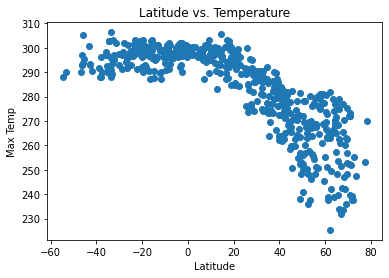

In [31]:
# Build scatter plot for latitude vs. temperature - NORTHERN HEMISPHERE
x_values = city_data_df["Lat"]
y_values = city_data_df["Max Temp"]
plt.scatter(x_values, y_values)
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.title('Latitude vs. Temperature')

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

In [ ]:
# Build the scatter plots for latitude vs. humidity
# YOUR CODE HERE

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

In [ ]:
# Build the scatter plots for latitude vs. cloudiness
# YOUR CODE HERE

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

In [ ]:
# Build the scatter plots for latitude vs. wind speed
# YOUR CODE HERE

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [ ]:
# Build scatter plot for latitude vs. temperature
x_values = city_data_df_s["Lat"]
y_values = city_data_df_s["Max Temp"]
plt.scatter(x_values, y_values)
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.title('Latitude vs. Temperature - Southern Hemisphere')

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

In [ ]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE

In [ ]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE

# Display sample data
northern_hemi_df.head()

In [ ]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE

# Display sample data
southern_hemi_df.head()

###  Temperature vs. Latitude Linear Regression Plot

In [ ]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE

In [ ]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

In [ ]:
# Northern Hemisphere
# YOUR CODE HERE

In [ ]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

In [ ]:
# Northern Hemisphere
# YOUR CODE HERE

In [ ]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

In [ ]:
# Northern Hemisphere
# YOUR CODE HERE

In [ ]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE